<h1 align="center">Experiment No. 06</h1>
<hr>

<p style="font-size:20px;"><i>$$Write\ a\ program\ to\ convolve\ two\ continuous\ time\ signals.\ Plot\ all\ the\ signals.\ Verify\ the\ result\ by\ analytical\ calculation.$$</i></p>
<hr>





<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
def getPlotReady(title='',xLabel='', yLabel='', figSize=None):
    fig = plt.figure()
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
        
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title,fontdict={'fontsize': 20}, pad=15.0)
    ax.set_xlabel(xLabel,fontdict={'fontsize': 16})
    ax.set_ylabel(yLabel,fontdict={'fontsize': 16})

In [3]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        axes[index].plot(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px;">$$\begin{aligned}&Convolution\ of\ two\ signals.\end{aligned} $$</p>

In [4]:
def x(t):
    if t>=0 and t<=1:
        return 1
    return 0

def h(t):
    if t>=-1 and t<0:
        return t + 1
    if t>=0 and t<=2:
        return 1
    return 0

In [5]:
def convolve(T):
    sum = 0
    t = -2
    dx = 0.005
    while t<5:
        sum = sum + h(T-t) * x(t) * dx
        t += dx
    return sum

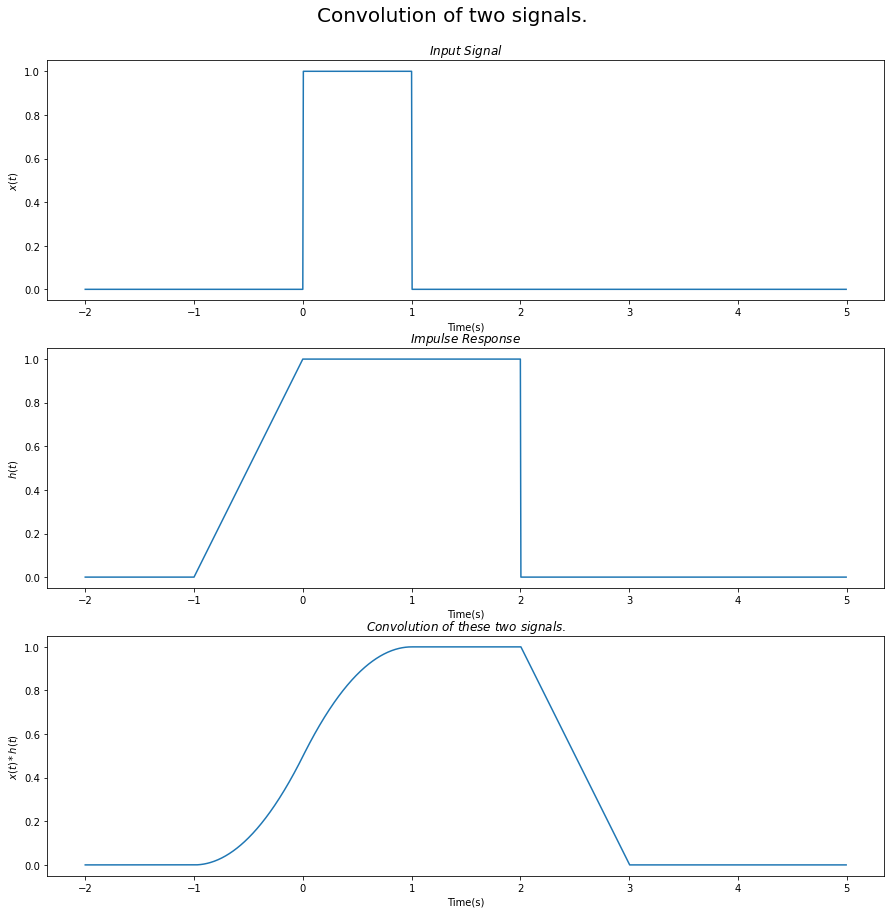

In [6]:
times = np.arange(-2,5, 0.005)

inputSignal = [x(t) for t in times]
impulseResponse = [h(t) for t in times]
conv = [convolve(t) for t in times]

signals = [{'title':'$Input\ Signal$','x':times, 'y':inputSignal, 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Impulse\ Response$','x':times, 'y':impulseResponse, 'xlabel':'Time(s)', 'ylabel':'$h(t)$'},
           {'title':'$Convolution\ of\ these\ two\ signals.$','x':times, 'y':conv, 'xlabel':'Time(s)', 'ylabel':'$x(t) * h(t)$'}]

getReadySubplot(title='Convolution of two signals.', signals=signals, figSize=(15,15))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&Dynamic\ view\ of\ convolution.\end{aligned} $$</p>

In [7]:
tgraph = graph(xtitle='x',ytitle='f(X)', xmin=-3.1,xmax=5,width=800,height=600)
ff= gcurve(color=color.blue, label="f(t)")
fg= gcurve(color=color.red, label="g(t)")
# fc= gcurve(color=color.green, label="f*g")

fc = gvbars(color=color.green,delta=0.005)
fcline = gcurve()



def dynamicViewOfConvolution():
    dx = 0.004
    T=-3
    dt = 0.005
    while T<5:
        rate(300)
        data = []
        t = -3
        while t<5:
            tem = x(t-T)
            data = data + [[t,tem]]
            t = t + dt
        ff.data = data
        fg.plot(T, h(t))
        fc.plot(T,convolve(T))
        fcline.plot(T,convolve(T))
        T = T + dx

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
dynamicViewOfConvolution();